In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import nltk
from ast import literal_eval
from wordcloud import WordCloud

# import required libraries

In [2]:
#load data files

reviews_df = pd.read_csv('../Assets/reviews_200p_cleaned.csv')
titles_df = pd.read_csv('../Assets/titles_200p_cleaned.csv')
users_df = pd.read_csv('../Assets/users_200p_cleaned.csv')

In [3]:
reviews_df.head()

,review_id,title_id,title_english,title_romaji,user_id,score,rating,ratingCount,text_summary,text_body,lang,text_body_cleaned,text_body_cleaned_token
0,2791,30002,Berserk,Berserk,127937,85,23,53,This would be the first time i try tackling a ...,"Alrightee alrightee alrightee, here is my bers...",en,Alrightee alrightee alrightee berserk review f...,"['berserk', 'review', 'first', 'review', 'real..."
1,3811,30002,Berserk,Berserk,118781,100,191,208,One person's thoughts on one man's masterpiece.,This review contains spoilers.\n\nWhen one thi...,en,This review contains spoilers When one thinks ...,"['review', 'contains', 'spoilers', 'one', 'thi..."
2,11421,30002,Berserk,Berserk,403142,100,480,510,A Timeless and Peerless Masterpiece - The Grea...,# ~~~___A Timeless and Peerless Masterpiece - ...,en,A Timeless Peerless Masterpiece The Greatest M...,"['first', 'part', 'review', 'read', 'spoiler',..."
3,11781,30002,Berserk,Berserk,63817,100,90,97,This wasn't how any of us wanted it to go. Nev...,~~~img(https://i.imgur.com/2jXWSu7.png)~~~\n\n...,en,img https imgur com jXWSu png This review goin...,"['https', 'com', 'j', 'png', 'review', 'going'..."
4,12405,30002,Berserk,Berserk,5435290,60,16,146,"Short {RECORDBREAKING, TURBOHYPE, GIGACHAD} Go...",I will try be as short as possible. Feel free ...,en,I try short possible Feel free ask questions w...,"['try', 'short', 'possible', 'free', 'ask', 'q..."


In [4]:
reviews_df[['score', 'rating', 'ratingCount']].describe()

,score,rating,ratingCount
count,8221.000000,8221.000000,8221.000000
mean,77.410656,36.794915,54.275514
std,20.896150,44.823116,74.863887
min,0.000000,1.000000,1.000000
25%,70.000000,14.000000,20.000000
50%,82.000000,25.000000,35.000000
75%,92.000000,43.000000,60.000000
max,100.000000,943.000000,1923.000000


In [5]:
reviews_df.loc[:, ~reviews_df.columns.isin(['review_id', 'title_id'])].groupby('title_romaji').mean().sort_values('rating', ascending=False)

,score,rating,ratingCount
title_romaji,,,
PUPARIA,78.000000,193.0,201.000000
Sabishisugite Rezu Fuzoku ni Ikimashita Report,100.000000,172.0,181.000000
Pingu in the City,83.500000,146.5,159.500000
Uramichi Oniisan,95.000000,140.0,142.000000
Gintama°,95.666667,125.0,134.333333
...,...,...,...
Shinobi Life,55.000000,1.5,1.500000
Yeongwonhan Neoui Geojinmal,100.000000,1.0,2.000000
Old Boy,60.000000,1.0,7.000000


In [6]:
titles_df = titles_df[titles_df.adult==False]
# Filtered out adult content for the purpose of this analysis
titles_df.head()

,title_id,title_english,title_romaji,type,duration,start_year,chapters,volume,publishing_status,country,...,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,title_romaji_type,synopsis_cleaned,synopsis_source,synopsis_wc,synopsis_cleaned_token
0,30002,Berserk,Berserk,MANGA,NaN,1989.0,NaN,NaN,RELEASING,JP,...,0,0,0,0,0,Berserk_MANGA,His name Guts Black Swordsman feared warrior s...,Dark Horse,425,"['name', 'feared', 'warrior', 'spoken', 'whisp..."
1,31706,NaN,JoJo no Kimyou na Bouken: Steel Ball Run,MANGA,NaN,2004.0,95.0,24.0,FINISHED,JP,...,0,0,1,1,0,JoJo no Kimyou na Bouken: Steel Ball Run_MANGA,Originally presented unrelated story series la...,Wikipedia,346,"['presented', 'unrelated', 'story', 'series', ..."
2,114129,Gintama: THE VERY FINAL,Gintama: THE FINAL,ANIME,104.0,2021.0,NaN,NaN,FINISHED,JP,...,1,0,0,0,0,Gintama: THE FINAL_ANIME,Gintama THE FINAL rd final film adaptation rem...,no match,82,"['rd', 'final', 'film', 'adaptation', 'remaind..."
3,30013,One Piece,ONE PIECE,MANGA,NaN,1997.0,NaN,NaN,RELEASING,JP,...,0,0,0,0,0,ONE PIECE_MANGA,As child Monkey D Luffy inspired become pirate...,Viz Media,348,"['child', 'inspired', 'become', 'pirate', 'lis..."
4,124194,Fruits Basket The Final Season,Fruits Basket: The Final,ANIME,24.0,2021.0,NaN,NaN,FINISHED,JP,...,0,1,0,1,0,Fruits Basket: The Final_ANIME,After last season revelations Soma family move...,Funimation,277,"['last', 'season', 'revelations', 'family', 'm..."


In [7]:
titles_df.groupby('type').mean()

# ANIME seems to be more popular in general.  However, Manga has higher mean score compared to anime.
# This is within expectation, given i) anime is likely to have better exposure both domestically and globally
# 2) manga tends to be seem as the "original material" and subjected to less/no future edits, such as edits during 
# localization of anime oversea

# This is also why a work may have multiple anime and manga entries as they can
# i) with multiple releases/seasons with different production companies/teams
# ii) variation of plots and stories that they are considered different work.

,title_id,duration,start_year,chapters,volume,adult,average_score,mean_score,popularity,favorites,...,Music,Mystery,Psychological,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,synopsis_wc
type,,,,,,,,,,,,,,,,,,,,,
ANIME,43304.367233,34.721394,2011.402284,NaN,NaN,0.0,71.775093,72.756506,31963.050717,939.314657,...,0.055497,0.105682,0.077005,0.224110,0.186405,0.229156,0.069570,0.172597,0.029209,315.139140
MANGA,84752.676157,NaN,2012.121023,62.911635,7.783744,0.0,70.961744,75.027802,4174.161699,216.042260,...,0.011788,0.099644,0.105649,0.520907,0.072509,0.255783,0.031139,0.173488,0.021797,306.180827


In [8]:
titles_df.loc[:, ~titles_df.columns.isin(['review_id', 'title_id'])].groupby('title_romaji').mean().sort_values('mean_score', ascending=False)

,duration,start_year,chapters,volume,adult,average_score,mean_score,popularity,favorites,score_10,...,Music,Mystery,Psychological,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,synopsis_wc
title_romaji,,,,,,,,,,,,,,,,,,,,,
Fata Morgana no Yakata: Anata no Genten ni Itaru Monogatari,NaN,2014.0,21.0,5.0,0.0,87.0,93.0,1371.0,322.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1178.0
Koimonogatari,NaN,2011.0,39.0,1.0,0.0,85.0,93.0,871.0,85.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,702.0
Berserk,NaN,1989.0,NaN,NaN,0.0,93.0,93.0,116265.0,21566.0,495.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,425.0
Bungou Stray Dogs: STORM BRINGER,NaN,2021.0,6.0,1.0,0.0,79.0,92.0,1384.0,67.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,289.0
Gintama: THE FINAL,104.0,2021.0,NaN,NaN,0.0,92.0,92.0,23496.0,1804.0,110.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tengen Toppa Gurren Lagann: Ore no Gurren wa Pikka-Pika!!,12.0,2007.0,NaN,NaN,0.0,64.0,64.0,7412.0,32.0,23.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,168.0
number24,24.0,2020.0,NaN,NaN,0.0,64.0,64.0,15208.0,172.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,401.0
Brave Witches,24.0,2016.0,NaN,NaN,0.0,64.0,64.0,10224.0,66.0,57.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,67.0


In [9]:
# Title_romanji is used instead of title_english because
# 1) all Japanese titles always have a romanji title.  Romanji is the romanization of the Japanese language using Latin script
# since the website/data source is based in Japan, a romanji name is expected to assign to all non-Japanese title.  
# 2) Romanji titles tend to be phonetic representation of non-Japanese titles.
# 3) title_english can be either official names of a Title or oversea translated/dubbed title names, which can be seem as less accurate

In [10]:
titles_df[['duration', 'chapters', 'volume', 'average_score', 'mean_score', 'popularity', 'favorites']].describe()

#duration/chapters/volume has a minimum value of 1.  This may suggest there are titles that have
# 1) short-stories that are completed with 1 release
# 2) titles/test titles that are only able to run for single publication (limited publication, etc).

# popularity/favorites distribution showsn that max values are noticably much higher than 25%/50%/75% percentile values
# this suggests reception/populatity of titles increase exponentially and has skewed distributions.   
# manga artists/company may also face a "lottery payoff" scenario (top participants get paid much more than average)

,duration,chapters,volume,average_score,mean_score,popularity,favorites
count,3758.000000,3180.000000,2719.000000,8262.000000,8262.000000,8262.000000,8262.000000
mean,34.721394,62.911635,7.783744,71.332486,73.992496,16840.944081,545.725611
std,30.310334,89.845854,9.088860,5.292437,5.110231,41471.153582,2217.127083
min,1.000000,1.000000,1.000000,64.000000,64.000000,140.000000,0.000000
25%,23.000000,10.000000,2.000000,67.000000,70.000000,1393.000000,22.000000
50%,24.000000,34.000000,4.000000,70.000000,73.000000,3530.500000,58.000000
75%,28.000000,80.000000,11.000000,74.000000,77.000000,12290.000000,220.000000
max,168.000000,1126.000000,78.000000,93.000000,93.000000,587454.000000,54437.000000


In [11]:
users_df.head()

,user_id,about,avatar,about_lang,about_cleaned,about_cleaned_token
0,1,Admin of this site and AniChart.net.\n\n__I no...,https://s4.anilist.co/file/anilistcdn/user/ava...,en,Admin site AniChart net I longer handle data c...,"['site', 'net', 'longer', 'handle', 'data', 'c..."
1,2,__he/him â¢ Lead Community Mod & Developer__\...,https://s4.anilist.co/file/anilistcdn/user/ava...,en,Lead Community Mod Developer I watch anime ins...,"['watch', 'anime', 'instead', 'working', 'http..."
2,6,Hey there! Welcome to my profile!\r\nMy name i...,https://s4.anilist.co/file/anilistcdn/user/ava...,en,Hey Welcome profile My name Richard I male age...,"['profile', 'name', 'male', 'age', 'food', 'pi..."
3,7,I write about anime on my blog: http://jamieja...,https://s4.anilist.co/file/anilistcdn/user/ava...,en,I write anime blog http jamiejakov,"['write', 'anime', 'blog', 'http']"
4,8,I'll do this later. ><,https://s4.anilist.co/file/anilistcdn/user/ava...,en,I later,['later']


In [12]:
#1r = LinearRegression()
#Ir.fit(X_train, y_train)

titles_lr = LinearRegression()

titles_X_train = titles_df[[ 'Action', 'Adventure', 'Comedy', 'Drama', 'Ecchi', 'Fantasy', 'Hentai',
        'Horror', 'Mahou Shoujo', 'Mecha', 'Music', 'Mystery', 'Psychological',
       'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural',
       'Thriller']]

titles_y_train = titles_df['average_score']
titles_lr.fit(titles_X_train, titles_y_train)

#titles_df.columns

print(titles_lr.coef_)

[ 1.30721759e+00  8.61338419e-01  8.54149552e-01  2.06804792e+00
 -1.76818890e+00  4.96616609e-01  2.22044605e-16 -1.37770540e+00
 -8.39345750e-01 -3.06979912e-01  1.50457620e+00  1.58130289e+00
  2.24435637e+00 -1.84837514e-01  3.79319538e-01  2.03597372e+00
  2.20759240e+00  1.14417323e+00  1.88631944e+00]


In [13]:
titles_X_train = titles_df[[ 'Action', 'Adventure', 'Comedy', 'Drama', 'Ecchi', 'Fantasy', 
        'Horror', 'Mahou Shoujo', 'Mecha', 'Music', 'Mystery', 'Psychological',
       'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural',
       'Thriller']]

titles_y_train = titles_df['average_score']

X2 = sm.add_constant(titles_X_train)
titles_est = sm.OLS(titles_y_train, X2)
titles_est2 = titles_est.fit()
print(titles_est2.summary())

                            OLS Regression Results                            
Dep. Variable:          average_score   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     63.26
Date:                Sat, 16 Jul 2022   Prob (F-statistic):          2.45e-215
Time:                        09:28:50   Log-Likelihood:                -24955.
No. Observations:                8262   AIC:                         4.995e+04
Df Residuals:                    8243   BIC:                         5.008e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            68.4663      0.150    457.470

In [14]:
reviews_df.columns

Index(['review_id', 'title_id', 'title_english', 'title_romaji', 'user_id',
       'score', 'rating', 'ratingCount', 'text_summary', 'text_body', 'lang',
       'text_body_cleaned', 'text_body_cleaned_token'],
      dtype='object')

In [15]:
reviews_df_02 = reviews_df
reviews_df_02['text_body_cleaned_token'] = reviews_df_02['text_body_cleaned_token'].apply(literal_eval)
reviews_df_02 = reviews_df_02.explode('text_body_cleaned_token')
reviews_df_02['text_body_cleaned_token'].value_counts()


like            35192
one             32317
characters      32157
show            31945
anime           31196
                ...  
diminishment        1
convertible         1
villas              1
organises           1
eine                1
Name: text_body_cleaned_token, Length: 29185, dtype: int64

In [16]:
titles_df_02 = titles_df
titles_df_02['synopsis_cleaned_token'] = titles_df_02['synopsis_cleaned_token'].apply(literal_eval)
titles_df_02 = titles_df_02.explode('synopsis_cleaned_token')
titles_df_02['synopsis_cleaned_token'].value_counts()


school        2356
one           2120
world         2091
life          2032
new           1649
              ... 
province         1
nook             1
legitimate       1
disagrees        1
bowl             1
Name: synopsis_cleaned_token, Length: 15456, dtype: int64

In [17]:
users_df_02 = users_df
users_df_02['about_cleaned_token'] = users_df_02['about_cleaned_token'].apply(literal_eval)
users_df_02 = users_df_02.explode('about_cleaned_token')
users_df_02['about_cleaned_token'].value_counts()

anime       982
com         560
https       542
http        430
like        330
           ... 
selling       1
athletic      1
blown         1
ears          1
five          1
Name: about_cleaned_token, Length: 4110, dtype: int64

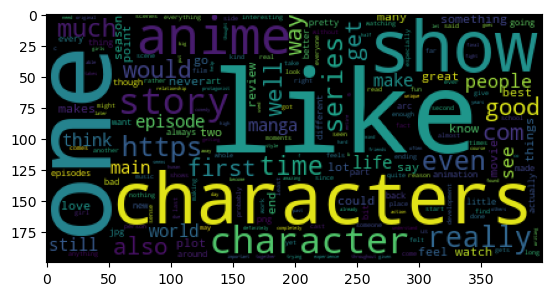

In [18]:
reviews_wordcloud = WordCloud().generate_from_frequencies(reviews_df_02['text_body_cleaned_token'].value_counts(normalize=True))
plt.imshow(reviews_wordcloud)
plt.show(reviews_wordcloud)

# Among reviews, "characters" is one of the most popular feature being discussed in reviews.
# story is also another one that seems quite popular.

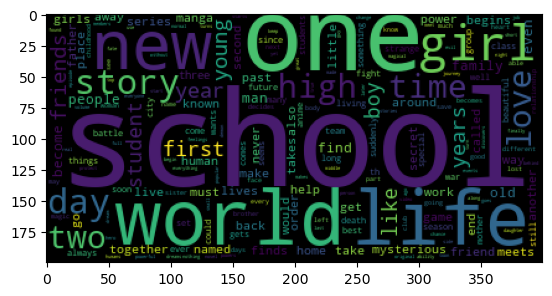

In [19]:
titles_wordcloud = WordCloud().generate_from_frequencies(titles_df_02['synopsis_cleaned_token'].value_counts(normalize=True))
plt.imshow(titles_wordcloud)
plt.show(titles_wordcloud)

# titles synopsis: school seems to be a keyword that appears a lot.  This may suggest a good number of anime/manage has a school setting where the story takes place.
# "World" is another popular word.  This is not a surprise as an anime/manage usually has a fictional background which requires worldbuilding and rules unique to that realm.

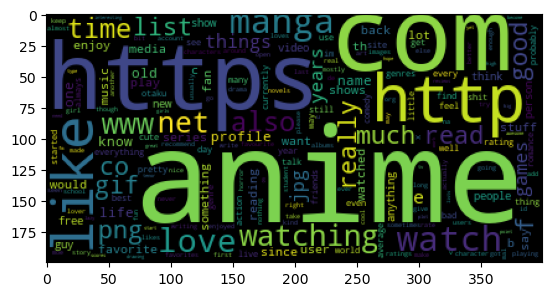

In [20]:
users_wordcloud = WordCloud().generate_from_frequencies(users_df_02['about_cleaned_token'].value_counts(normalize=True))
plt.imshow(users_wordcloud)
plt.show(users_wordcloud)

# Users profiles have "anime", "manage" and "watching" as some of the most frequently used words.
# items such https, com, gif, png also appear frequently.  This suggests users may like to link website and pictures (e.g. gif/png) in the profile to highlight certain information about themselves.